<a href="https://colab.research.google.com/github/dlscks/pythondemo/blob/main/python_26_naver_movie_review_wordcloud_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 워드클라우드와 텍스트마이닝

### colab한글화

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


### jpype 설치
- python에서 java라이브러리를 이용할 수 있도록 설치한다.

In [ ]:
#https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
# 아래 부분 바로 실행하면 jpype설치됨
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 5.3 MB/s 


In [ ]:
# 한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

In [ ]:
# 기본
import numpy as np  #numpy 패키지 가져오기
import pandas as pd  # pandas 패키지 가져오기
import matplotlib.pyplot as plt  # 시각화 패키지 가져오기

# 데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
!pip list

### 데이터 가져오기

In [ ]:
df = pd.read_csv('data_crowing/movie_reviews.csv')
df.head()

,Unnamed: 0,title,story,genre,genre_code
0,0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,['액션'],[0]
1,1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"['공연실황', '다큐멘터리']","[7, 6]"
2,2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"['애니메이션', '코미디', '가족']","[1, 11, 14]"
3,3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,['다큐멘터리'],[6]
4,4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"['다큐멘터리', '드라마']","[6, 2]"


In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   title       50 non-null     object
 2   story       50 non-null     object
 3   genre       50 non-null     object
 4   genre_code  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


### 명사단어 추출

#### 1. 세종사전 실행

In [ ]:
from konlpy.tag import Okt
twitter = Okt()

#### 2. 단어 리스트 만들기

In [ ]:
word_list = []
word_list = df['story']

In [ ]:
word_list

#### 3. 형태소 분리 및 품사태깅

In [ ]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('인피니티', 'Noun'), ('워', 'Noun'), ('이후', 'Noun'), ('절반', 'Noun'), ('만', 'Josa'), ('살아남은', 'Verb'), ('지구', 'Noun'), ('\xa0', 'Foreign'), ('마지막', 'Noun'), ('희망이', 'Noun'), ('된', 'Verb'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('먼저', 'Noun'), ('떠난', 'Verb'), ('그', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위해', 'Noun'), ('모든', 'Noun'), ('것', 'Noun'), ('을', 'Josa'), ('걸었다', 'Verb'), ('\xa0\xa0', 'Foreign'), ('위대한', 'Adjective'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('운명', 'Noun'), ('을', 'Josa'), ('바꿀', 'Verb'), ('최후', 'Noun'), ('의', 'Josa'), ('전쟁', 'Noun'), ('이', 'Josa'), ('펼쳐진다', 'Verb')]


#### 4. 명사만 추출

In [ ]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [ ]:
noun_list

#### 5.명사가 두 문자 이상인것만 추출

In [ ]:
len(noun_list)

noun_list = [n for n in noun_list if len(n)>1]
noun_list[:10]

['최고', '파일럿', '이자', '전설', '인물', '매버릭톰', '크루즈', '자신', '졸업', '훈련']

#### 6. 단어 카운트

In [ ]:
counts = Counter(noun_list)
tags = counts.most_common(30)
len(tags)
tags

[('자신', 29),
 ('위해', 26),
 ('시작', 24),
 ('사랑', 21),
 ('사람', 19),
 ('김호중', 15),
 ('이야기', 15),
 ('인생', 13),
 ('다시', 13),
 ('세상', 13),
 ('모두', 12),
 ('아들', 12),
 ('전쟁', 12),
 ('시간', 12),
 ('케빈', 12),
 ('가장', 11),
 ('어머니', 11),
 ('운명', 11),
 ('아이', 10),
 ('명의', 10),
 ('사건', 10),
 ('그녀', 10),
 ('라이언', 10),
 ('황제', 10),
 ('임무', 9),
 ('마음', 9),
 ('엄마', 9),
 ('모든', 9),
 ('하나', 9),
 ('발견', 9)]

### WordCloud 생성

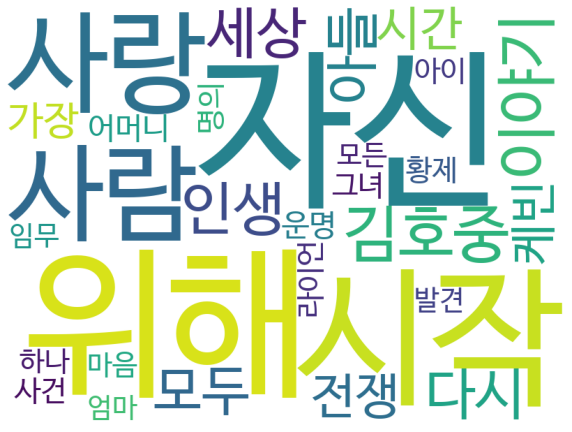

In [ ]:
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()